In [1]:

file_path = r'C:\Users\dev\Downloads\Job Hunting Demo.py'
with open(file_path, 'r') as text_io:
    demo_str = text_io.read()

In [2]:

import pyperclip

pyperclip.copy(demo_str)

In [3]:

import re
import networkx as nx

def_regex = re.compile(r'\bdef ([\w_]{3,})')
notebook_digraph = nx.DiGraph(env='jh')
for match in def_regex.finditer(demo_str):
    # match start: match.start()
    # match end (exclusive): match.end()
    # matched text: match.group()
    node_name = match.group().split(' ')[1]
    notebook_digraph.add_node(node_name)

In [4]:

for node_name in notebook_digraph.nodes():
    print(node_name)

clean_email
get_percent_fit
print_loc_computation
get_predictions_and_counts
get_quals_str
print_fit_job
qual_sum
print_job_description
un_msword_ify
get_quals_list
print_emails
add_new_orr
get_basic_quals
predict_job_hunt_percent_fit


In [5]:

notebook_digraph.add_edge('print_emails', 'clean_email', weight=2)

In [6]:

notebook_digraph.add_edge('print_emails', 'get_percent_fit', weight=1)
notebook_digraph.add_edge('get_basic_quals', 'get_percent_fit', weight=1)

In [7]:

notebook_digraph.add_edge('print_fit_job', 'print_loc_computation', weight=1)
notebook_digraph.add_edge('get_basic_quals', 'print_loc_computation', weight=1)

In [8]:

notebook_digraph.add_edge('print_fit_job', 'get_quals_str', weight=1)
notebook_digraph.add_edge('get_basic_quals', 'get_quals_str', weight=1)

In [9]:

notebook_digraph.add_edge('get_quals_list', 'un_msword_ify', weight=2)
notebook_digraph.add_edge('add_new_orr', 'un_msword_ify', weight=1)

In [10]:

notebook_digraph.add_edge('print_fit_job', 'get_quals_list', weight=1)
notebook_digraph.add_edge('print_job_description', 'get_quals_list', weight=1)
notebook_digraph.add_edge('print_emails', 'get_quals_list', weight=1)
notebook_digraph.add_edge('get_basic_quals', 'get_quals_list', weight=1)

In [11]:

notebook_digraph.add_edge('print_fit_job', 'predict_job_hunt_percent_fit', weight=1)
notebook_digraph.add_edge('qual_str', 'predict_job_hunt_percent_fit', weight=1)

In [12]:

import numpy as np
import matplotlib.patches as mpatches

def plot_graph(G, layout_dict, cmap='Access', fig_height=18):
    node_count = len(layout_dict)
    y_position_list = list(range(node_count+1))
    cut_array = pd.cut(np.array([-1.0, 1.0]), node_count+1, retbins=True)[1]
    for i, node in enumerate(layout_dict.keys()):

        # Find the y position from the list that is closest to the cut
        y_coord = min(y_position_list, key=lambda x: abs(x-cut_array[i+1]))
        y_position_list.remove(y_coord)

        layout_dict[node] = np.array((layout_dict[node][0], y_coord)).astype(np.float32)
    
    # Plot the graph using matplotlib
    fig = plt.figure(figsize=(18, fig_height))
    plt.axis('off')
    plt.yticks([], [])
    arrowstyle = mpatches.ArrowStyle.Simple(head_length=2., head_width=1.5, tail_width=0.05)
    node_collection = nx.draw_networkx_nodes(G, pos=layout_dict, alpha=0.5)
    weights = nx.get_edge_attributes(G, 'weight').values()
    edge_collection = nx.draw_networkx_edges(G, pos=layout_dict, alpha=0.25, arrowstyle=arrowstyle,
                                             edge_cmap=plt.get_cmap(cmap), edge_vmin=min(weights), edge_vmax=max(weights),
                                             edge_color=list(weights))
    labels_collection = nx.draw_networkx_labels(G, pos=layout_dict, font_size=12)
    axes_subplot = fig.get_axes()[0]
    xlim_tuple = axes_subplot.set_xlim(left=-1.25, right=1.25)

In [13]:

notebook_digraph.edges()

OutEdgeView([('print_fit_job', 'print_loc_computation'), ('print_fit_job', 'get_quals_str'), ('print_fit_job', 'get_quals_list'), ('print_fit_job', 'predict_job_hunt_percent_fit'), ('print_job_description', 'get_quals_list'), ('get_quals_list', 'un_msword_ify'), ('print_emails', 'clean_email'), ('print_emails', 'get_percent_fit'), ('print_emails', 'get_quals_list'), ('add_new_orr', 'un_msword_ify'), ('get_basic_quals', 'get_percent_fit'), ('get_basic_quals', 'print_loc_computation'), ('get_basic_quals', 'get_quals_str'), ('get_basic_quals', 'get_quals_list'), ('qual_str', 'predict_job_hunt_percent_fit')])

In [16]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

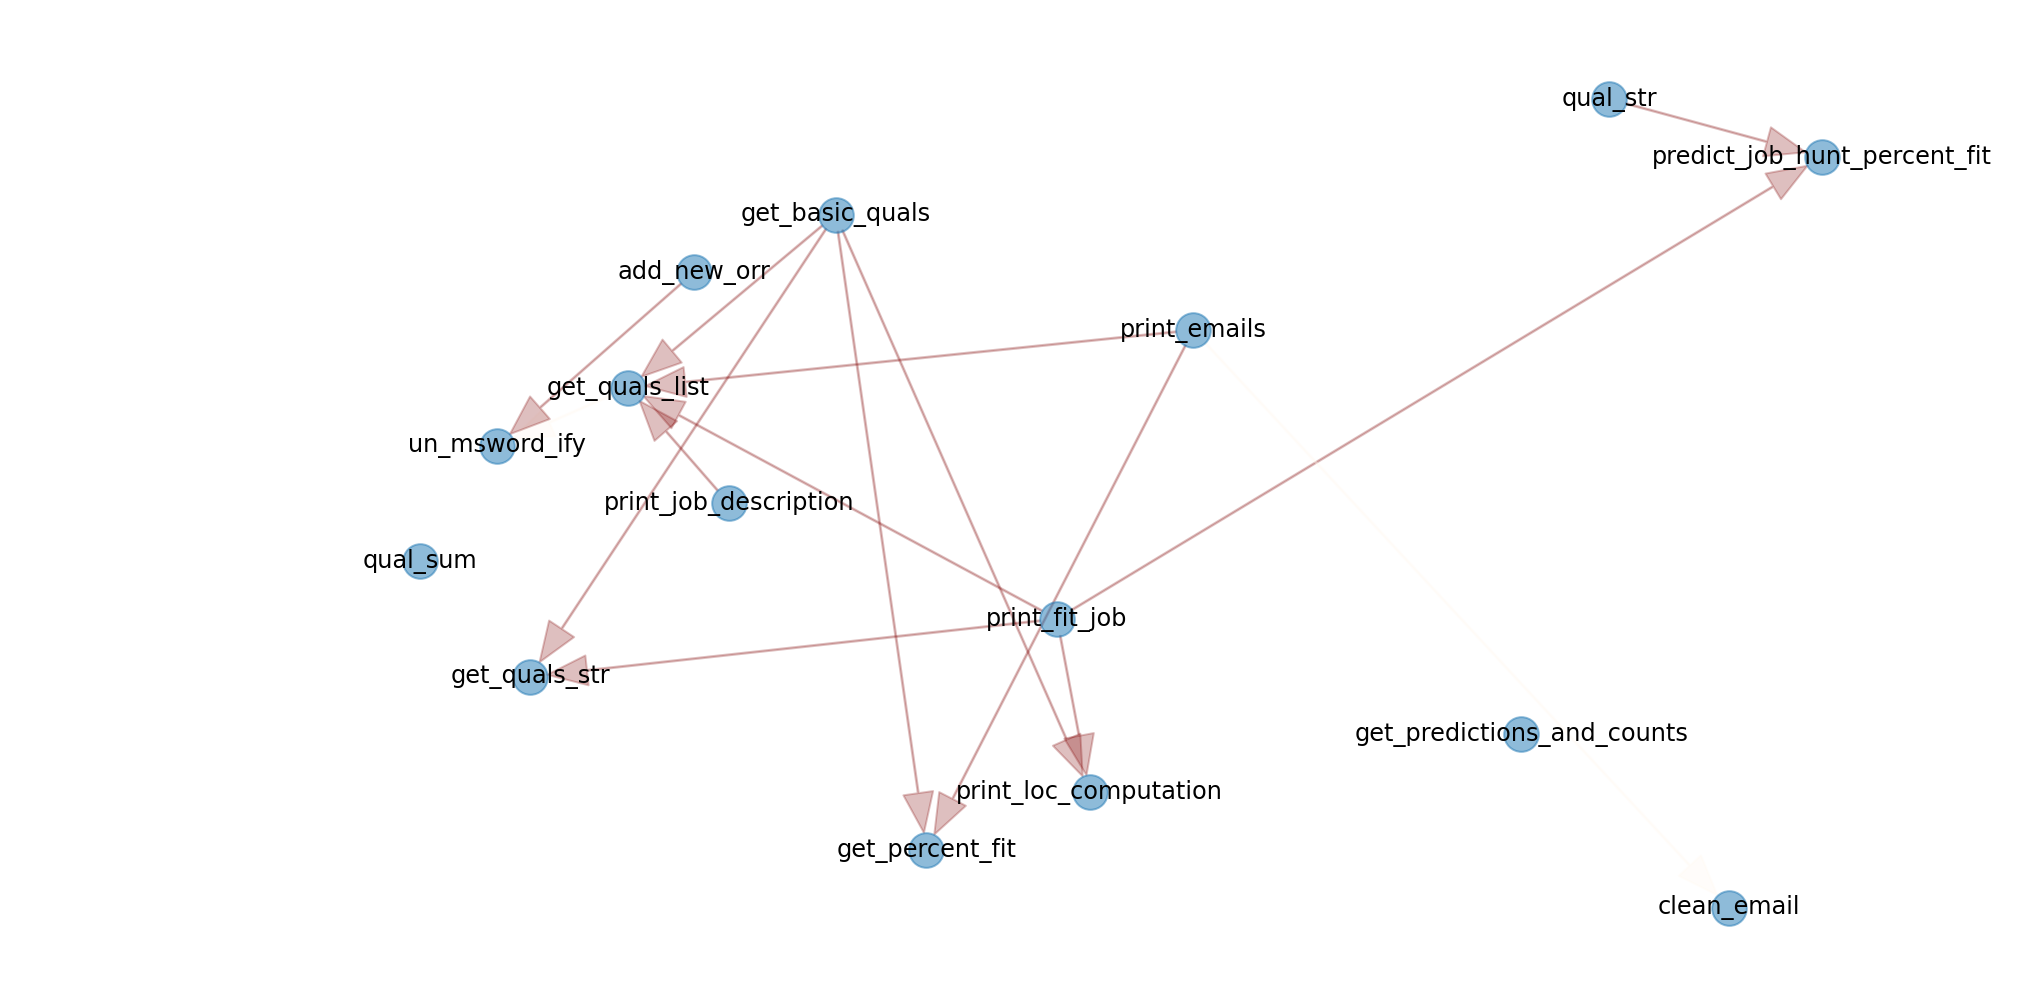

In [18]:

import pandas as pd

fruchterman_reingold_layout_dict = nx.fruchterman_reingold_layout(notebook_digraph)
plot_graph(notebook_digraph, fruchterman_reingold_layout_dict, cmap='OrRd_r', fig_height=9)

In [23]:

[f'nx.{fn}' for fn in dir(nx) if 'layout' in fn.lower()]

['nx.bipartite_layout',
 'nx.circular_layout',
 'nx.fruchterman_reingold_layout',
 'nx.kamada_kawai_layout',
 'nx.layout',
 'nx.multipartite_layout',
 'nx.planar_layout',
 'nx.random_layout',
 'nx.rescale_layout',
 'nx.rescale_layout_dict',
 'nx.shell_layout',
 'nx.spectral_layout',
 'nx.spiral_layout',
 'nx.spring_layout']

In [32]:

[f'nx.{fn}' for fn in dir(nx) if 'draw' in fn.lower()]

['nx.draw',
 'nx.draw_circular',
 'nx.draw_kamada_kawai',
 'nx.draw_networkx',
 'nx.draw_networkx_edge_labels',
 'nx.draw_networkx_edges',
 'nx.draw_networkx_labels',
 'nx.draw_networkx_nodes',
 'nx.draw_planar',
 'nx.draw_random',
 'nx.draw_shell',
 'nx.draw_spectral',
 'nx.draw_spring',
 'nx.drawing',
 'nx.planar_drawing']

In [34]:

nx.draw_spring(notebook_digraph)

NetworkXError: random_state_index is incorrect

In [28]:

[f'nx.{fn}' for fn in dir(notebook_digraph) if not fn.startswith('_')]

['nx.add_edge',
 'nx.add_edges_from',
 'nx.add_node',
 'nx.add_nodes_from',
 'nx.add_weighted_edges_from',
 'nx.adj',
 'nx.adjacency',
 'nx.adjlist_inner_dict_factory',
 'nx.adjlist_outer_dict_factory',
 'nx.clear',
 'nx.clear_edges',
 'nx.copy',
 'nx.degree',
 'nx.edge_attr_dict_factory',
 'nx.edge_subgraph',
 'nx.edges',
 'nx.get_edge_data',
 'nx.graph',
 'nx.graph_attr_dict_factory',
 'nx.has_edge',
 'nx.has_node',
 'nx.has_predecessor',
 'nx.has_successor',
 'nx.in_degree',
 'nx.in_edges',
 'nx.is_directed',
 'nx.is_multigraph',
 'nx.name',
 'nx.nbunch_iter',
 'nx.neighbors',
 'nx.node_attr_dict_factory',
 'nx.node_dict_factory',
 'nx.nodes',
 'nx.number_of_edges',
 'nx.number_of_nodes',
 'nx.order',
 'nx.out_degree',
 'nx.out_edges',
 'nx.pred',
 'nx.predecessors',
 'nx.remove_edge',
 'nx.remove_edges_from',
 'nx.remove_node',
 'nx.remove_nodes_from',
 'nx.reverse',
 'nx.size',
 'nx.subgraph',
 'nx.succ',
 'nx.successors',
 'nx.to_directed',
 'nx.to_directed_class',
 'nx.to_undire